In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')

<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
C:\Users\dcald\AppData\Local\Temp\ipykernel_16268\4050202945.py:23: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(X, Y_pred, label=f'$D = {slope/2:.5f} \pm {slope_std_err/2:.5f} $\n$R^2$ = {r_value**2:.5f}',
C:\Users\dcald\AppData\Local\Temp\ipykernel_16268\4050202945.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_csv("free-diffusion-variance.txt", delim_whitespace=True, header=None,encoding="utf-16")


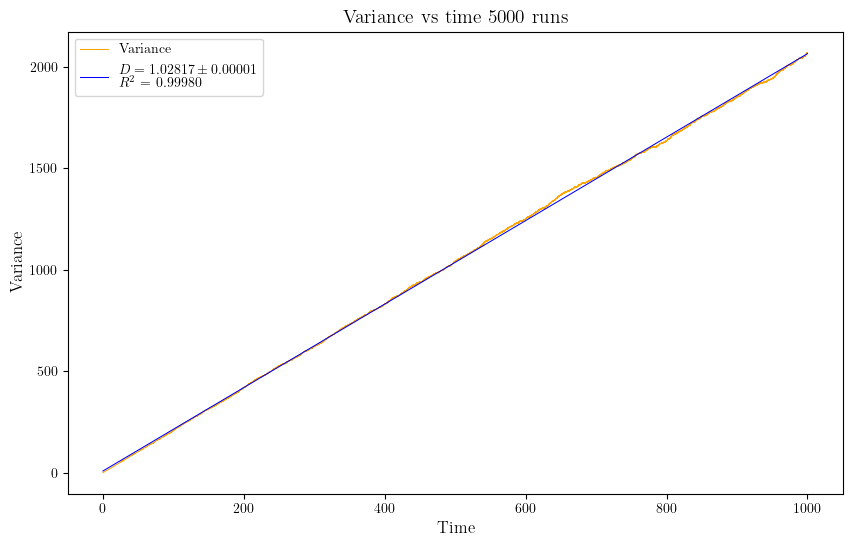

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

data=pd.read_csv("free-diffusion-variance.txt", delim_whitespace=True, header=None,encoding="utf-16")
# Assign column names for clarity
data.columns = ['Time', 'Variance']

X = data['Time'].values  # Independent variable (Time), reshaped for sklearn
Y = data['Variance'].values 

# Compute uncertainty in the slope using SciPy
slope, intercept, r_value, p_value, slope_std_err = linregress(X, Y)

# Generate predicted values for the trendline
Y_pred = slope*X+intercept

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='Variance',color='orange', linewidth=0.75)

# Plot the linear fit
plt.plot(X, Y_pred, label=f'$D = {slope/2:.5f} \pm {slope_std_err/2:.5f} $\n$R^2$ = {r_value**2:.5f}', 
         color='blue', linewidth=0.75)

# Adding labels, title, and legend
plt.title(r'Variance vs time 5000 runs', fontsize=14)
plt.xlabel(r'Time', fontsize=12)
plt.ylabel(r'Variance', fontsize=12)

plt.legend(fontsize=10)
# Display the plot
#plt.show()
plt.savefig('free-diffusion-variance.pdf',format='pdf')